<a href="https://colab.research.google.com/github/Series-Parallel/Machine_in_Deep_Learning/blob/main/Word_embeddings_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

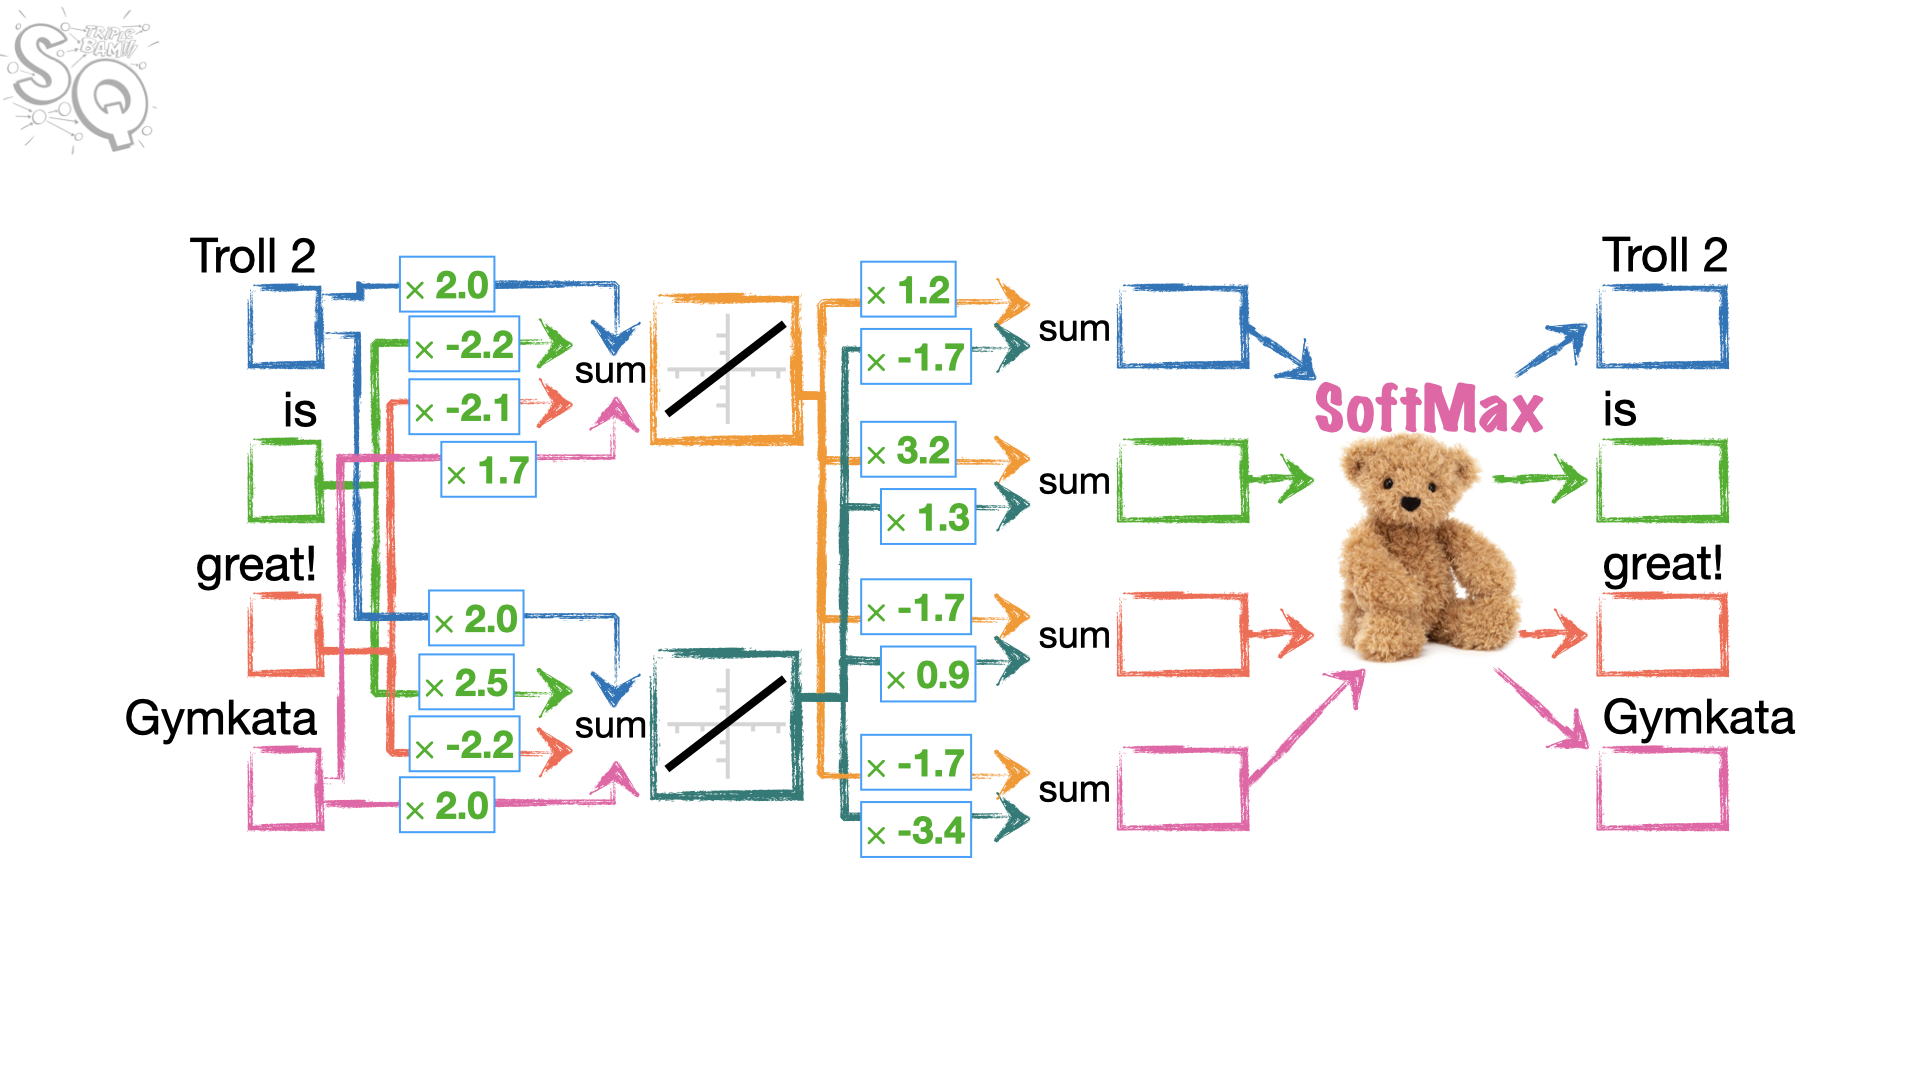

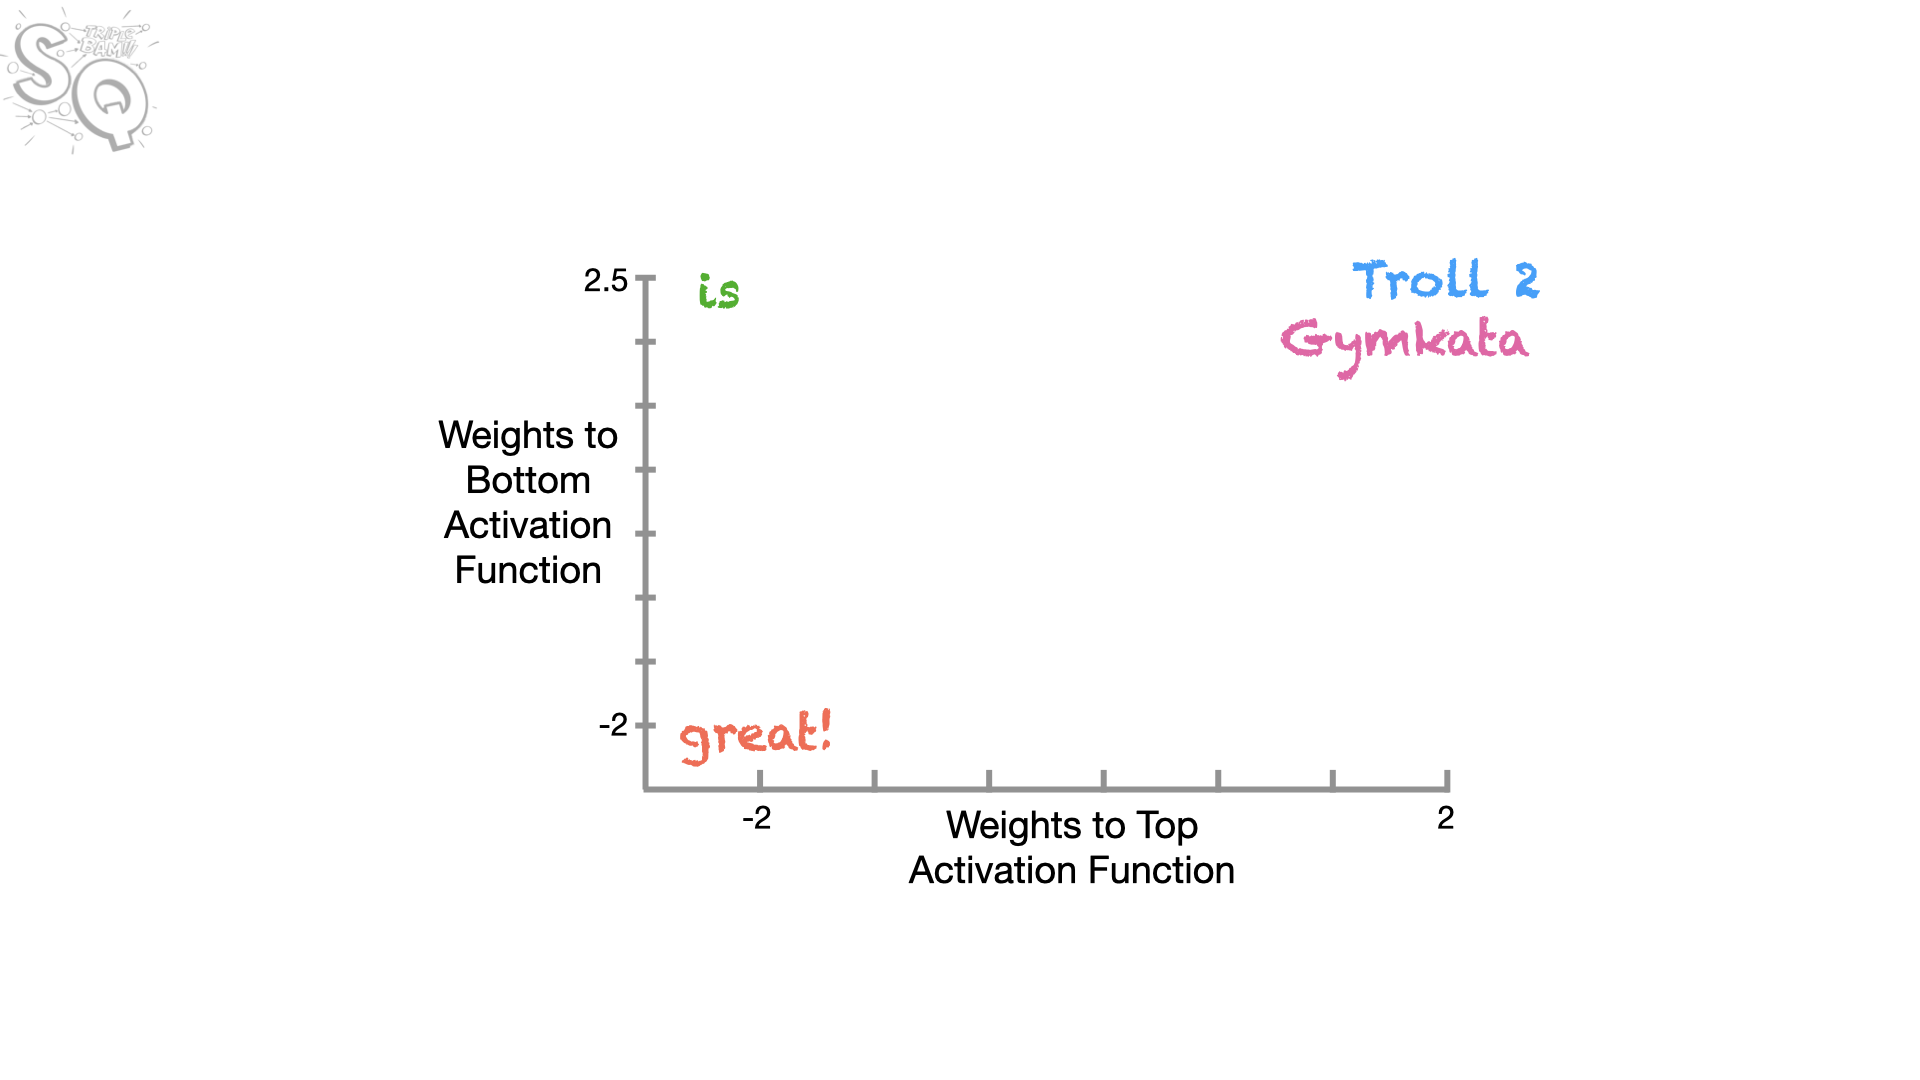

In [ ]:
import pip
try:
  __import__("lightning")
except ImportError:
  pip.main(['install', "lightning"])

In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.distributions.uniform import Uniform
from torch.utils.data import TensorDataset, DataLoader

import lightning as L

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
inputs = ([[1., 0., 0., 0.],
           [0., 1., 0., 0.],
           [0., 0., 1., 0.],
           [0., 0., 0., 1.]])

In [ ]:
labels = ([[0., 1., 0., 0.],
           [0., 0., 1., 0.],
           [0., 0., 0., 1.],
           [0., 1., 0., 0.]])

In [ ]:
dataset = TensorDataset(torch.tensor(inputs), torch.tensor(labels))
dataloader = DataLoader(dataset)

# Building and Training Word Embedding Unit from scratch

In [ ]:
class WordEmbeddingFromScartch(L.LightningModule):
    def __init__(self):
        super().__init__()

        L.seed_everything(seed=42)

        min_value = -0.5
        max_value = 0.5

        # INPUT
        self.input1_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.input1_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

        self.input2_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.input2_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

        self.input3_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.input3_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

        self.input4_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.input4_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

        # OUTPUT
        self.output1_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.output1_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

        self.output2_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.output2_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

        self.output3_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.output3_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

        self.output4_w1 = nn.Parameter(Uniform(min_value, max_value).sample())
        self.output4_w2 = nn.Parameter(Uniform(min_value, max_value).sample())

        # Loss Function
        self.loss = nn.CrossEntropyLoss()

    def forward(self, input):

        input = input[0]

        inputs_to_top_hidden = ((input[0] * self.input1_w1) +
                                (input[1] * self.input2_w1) +
                                (input[2] * self.input3_w1) +
                                (input[3] * self.input4_w1))

        inputs_to_bot_hidden = ((input[0] * self.input1_w2) +
                                (input[1] * self.input2_w2) +
                                (input[2] * self.input3_w2) +
                                (input[3] * self.input4_w2))

        output1 = ((inputs_to_top_hidden * self.output1_w1) +
                   (inputs_to_bot_hidden * self.output1_w2))
        output2 = ((inputs_to_top_hidden * self.output2_w1) +
                   (inputs_to_bot_hidden * self.output2_w2))
        output3 = ((inputs_to_top_hidden * self.output3_w1) +
                   (inputs_to_bot_hidden * self.output3_w2))
        output4 = ((inputs_to_top_hidden * self.output4_w1) +
                   (inputs_to_bot_hidden * self.output4_w2))

        output_presoftmax = torch.stack([output1, output2, output3, output4])

        return (output_presoftmax)

    def configure_optimizers(self):
        return Adam(self.parameters(), lr=0.1)

    def training_step(self, batch, batch_idx):
        input_i, label_i = batch
        output_i = self.forward(input_i)
        loss = self.loss(output_i, label_i[0])

        return loss

In [ ]:
modelFromScratch = WordEmbeddingFromScartch()

In [ ]:
print("Before optimization, the parameters are...")
for name, param in modelFromScratch.named_parameters():
    print(name, torch.round(param.data, decimals=2))

In [ ]:
data = {
    "w1": [modelFromScratch.input1_w1.item(), ## item() pulls out the tensor value as a float
           modelFromScratch.input2_w1.item(),
           modelFromScratch.input3_w1.item(),
           modelFromScratch.input4_w1.item()],
    "w2": [modelFromScratch.input1_w2.item(),
           modelFromScratch.input2_w2.item(),
           modelFromScratch.input3_w2.item(),
           modelFromScratch.input4_w2.item()],
    "token": ["Troll2", "is", "great", "Gymkata"],
    "input": ["input1", "input2", "input3", "input4"]
}
df = pd.DataFrame(data)
df

In [ ]:
sns.scatterplot(data=df, x="w1", y="w2")

## add the token that each dot represents to the graph
# Troll 2
plt.text(df.w1[0], df.w2[0], df.token[0],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

# is
plt.text(df.w1[1], df.w2[1], df.token[1],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

# great
plt.text(df.w1[2], df.w2[2], df.token[2],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

# Gymkata
plt.text(df.w1[3], df.w2[3], df.token[3],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.show()

In [ ]:
trainer = L.Trainer(max_epochs=100)
trainer.fit(modelFromScratch, train_dataloaders=dataloader)

In [ ]:
print("After optimization, the parameters are...")
for name, param in modelFromScratch.named_parameters():
    print(name, torch.round(param.data, decimals=2))

In [ ]:
data = {
    "w1": [modelFromScratch.input1_w1.item(), ## item() pulls out the tensor value as a float
           modelFromScratch.input2_w1.item(),
           modelFromScratch.input3_w1.item(),
           modelFromScratch.input4_w1.item()],
    "w2": [modelFromScratch.input1_w2.item(),
           modelFromScratch.input2_w2.item(),
           modelFromScratch.input3_w2.item(),
           modelFromScratch.input4_w2.item()],
    "token": ["Troll2", "is", "great", "Gymkata"],
    "input": ["input1", "input2", "input3", "input4"]
}
df = pd.DataFrame(data)
df

In [ ]:
sns.scatterplot(data=df, x="w1", y="w2")

## NOTE: For Troll2 and and Gymkata, we're adding offsets to where to print the tokens because otherwise
## they will be so close to each other that they will overlap and be unreadable.

## Troll 2
plt.text(df.w1[0]-0.2, df.w2[0]+0.1, df.token[0],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

## is
plt.text(df.w1[1], df.w2[1], df.token[1],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

## great
plt.text(df.w1[2], df.w2[2], df.token[2],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

## gymkata
plt.text(df.w1[3]-0.3, df.w2[3]-0.3, df.token[3],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.show()

In [ ]:
## Let's see what the model predicts

## First, let's create a softmax object...
softmax = nn.Softmax(dim=0) ## dim=0 applies softmax to rows, dim=1 applies softmax to columns

## Now let's...

## print the predictions for "Troll2"
print(torch.round(softmax(modelFromScratch(torch.tensor([[1., 0., 0., 0.]]))),
                  decimals=2))

## print the predictions for "is"
print(torch.round(softmax(modelFromScratch(torch.tensor([[0., 1., 0., 0.]]))),
                  decimals=2))

## print the predictions for "great"
print(torch.round(softmax(modelFromScratch(torch.tensor([[0., 0., 1., 0.]]))),
                  decimals=2))

## print the predictions for "Gymkata"
print(torch.round(softmax(modelFromScratch(torch.tensor([[0., 0., 0., 1.]]))),
                  decimals=2))

# Using nn.linear()


In [ ]:
class WordEmbeddingWithLinear(L.LightningModule):

    def __init__(self):

        super().__init__()


        L.seed_everything(seed=42)

        self.input_to_hidden = nn.Linear(in_features=4, out_features=2, bias=False)

        self.hidden_to_output = nn.Linear(in_features=2, out_features=4, bias=False)


        self.loss = nn.CrossEntropyLoss()


    def forward(self, input):


        hidden = self.input_to_hidden(input)

        output_values = self.hidden_to_output(hidden)

        return(output_values)


    def configure_optimizers(self):

        return Adam(self.parameters(), lr=0.1)


    def training_step(self, batch, batch_idx):


        input_i, label_i = batch # collect input
        output_i = self.forward(input_i) # run input through the neural network
        loss = self.loss(output_i, label_i) ## loss = cross entropy

        return loss

In [ ]:
modelLinear = WordEmbeddingWithLinear()

print("Before optimization, the parameters are...")
for name, param in modelLinear.named_parameters():
    print(name, torch.round(param.data, decimals=2))

In [ ]:
data = {
    ## NOTE: Unlike before, when we called item() on each individual
    ##       Weight, now that we are using nn.Linear, we access the
    ##       Weights with ".weight". We then have to remove the gradients
    ##       associated with each Weight, so we also call .detach().
    ##       Lastly, we then convert the tensor to a numpy array with
    ##       numpy().
    "w1": modelLinear.input_to_hidden.weight.detach()[0].numpy(), # [0] = Weights to top activation function
    "w2": modelLinear.input_to_hidden.weight.detach()[1].numpy(), # [1] = Weights to bottom activation function
    "token": ["Troll2", "is", "great", "Gymkata"],
    "input": ["input1", "input2", "input3", "input4"]
}
df = pd.DataFrame(data)
df

In [ ]:
sns.scatterplot(data=df, x="w1", y="w2")

## add the token each dot represents to the graph

## Troll 2
plt.text(df.w1[0], df.w2[0], df.token[0],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')
## is
plt.text(df.w1[1], df.w2[1], df.token[1],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')
## great
plt.text(df.w1[2], df.w2[2], df.token[2],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

## Gymkata
plt.text(df.w1[3], df.w2[3], df.token[3],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.show()

In [ ]:
trainer = L.Trainer(max_epochs=100)
trainer.fit(modelLinear, train_dataloaders=dataloader)

In [ ]:
print("After optimization, the parameters are...")
for name, param in modelLinear.named_parameters():
    print(name, param.data)


In [ ]:
data = {
    "w1": modelLinear.input_to_hidden.weight.detach()[0].numpy(),
    "w2": modelLinear.input_to_hidden.weight.detach()[1].numpy(),
    "token": ["Troll2", "is", "great", "Gymkata"],
    "input": ["input1", "input2", "input3", "input4"]
}
df = pd.DataFrame(data)
df

In [ ]:
sns.scatterplot(data=df, x="w1", y="w2")

## add the token each dot represents to the graph
## NOTE: For Troll2 and and Gymkata, we're adding offsets to where to print the tokens because otherwise
## they will be so close to each other that they will overlap and be unreadable.

# Troll 2
plt.text(df.w1[0]-0.2, df.w2[0]-0.3, df.token[0],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

# is
plt.text(df.w1[1], df.w2[1], df.token[1],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

# great
plt.text(df.w1[2], df.w2[2], df.token[2],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

# Gymkata
plt.text(df.w1[3]-0.3, df.w2[3]+0.2, df.token[3],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.show()

In [ ]:
## Let's see what the model predicts
softmax = nn.Softmax(dim=1) ## dim=0 applies softmax to rows, dim=1 applies softmax to columns

print(torch.round(softmax(modelLinear(torch.tensor([[1., 0., 0., 0.]]))), decimals=2)) ## print the predictions for "Troll2"
print(torch.round(softmax(modelLinear(torch.tensor([[0., 1., 0., 0.]]))), decimals=2)) ## print the predictions for "is"
print(torch.round(softmax(modelLinear(torch.tensor([[0., 0., 1., 0.]]))), decimals=2)) ## print the predictions for "great"
print(torch.round(softmax(modelLinear(torch.tensor([[0., 0., 0., 1.]]))), decimals=2)) ## print the predictions for "Gymkata"

# Use nn.Embedding() to load and use pre-trained Word Embeddings


In [ ]:
modelLinear.input_to_hidden.weight

In [ ]:
word_embeddings = nn.Embedding.from_pretrained(modelLinear.input_to_hidden.weight.T)

In [ ]:
word_embeddings.weight

In [ ]:
word_embeddings(torch.tensor(0))

In [ ]:
vocab = {'Troll2': 0,
         'is': 1,
         'great': 2,
         'Gymkata': 3}

In [ ]:
word_embeddings(torch.tensor(vocab['Troll2']))

In [ ]:
word_embeddings(torch.tensor(vocab['Gymkata']))

# Build and train a Word Embedding Unit using nn.Embedding() and nn.Linear()

In [ ]:
class WordEmbeddingWithEmbedding(L.LightningModule):

    def __init__(self):

        super().__init__()

        ## The first thing we do is set the seed for the random number generorator.
        ## This ensures that when someone creates a model from this class, that model
        ## will start off with the exact same random numbers as I started out with when
        ## I created this demo. At least, I hope that is what happens!!! :)
        L.seed_everything(seed=42)

        self.embed = nn.Embedding(4, 2) # 4 = number of words in the vocabulary, 2 = 2 numbers per embedding
        self.hidden_to_output = nn.Linear(2, 4, bias=False)

        ## We'll use CrossEntropyLoss in training_step()
        self.loss = nn.CrossEntropyLoss()


    def forward(self, input):

        hidden = self.embed(input[0])
        output_values = self.hidden_to_output(hidden)

        return(output_values)


    def configure_optimizers(self): # this configures the optimizer we want to use for backpropagation.
        return Adam(self.parameters(), lr=0.1)


    def training_step(self, batch, batch_idx): # take a step during gradient descent.
        input_i, label_i = batch # collect input
        output_i = self.forward(input_i[0]) # run input through the neural network
        loss = self.loss(output_i, label_i[0]) ## self.loss = cross entropy

        return loss

In [ ]:
inputsForEmbed = torch.tensor([[0], [1], [2], [3]]) ## NOTE: Troll2 = 0, is = 1, great = 2, Gymkata = 3
labels = torch.tensor([[0., 1., 0., 0.], [0., 0., 1., 0.], [0., 0., 0., 1.], [0., 1., 0., 0.]])

datasetForEmbed = TensorDataset(inputsForEmbed, labels)
dataloaderForEmbed = DataLoader(datasetForEmbed)

In [ ]:
modelEmbed = WordEmbeddingWithEmbedding()

print("Before optimization, the parameters are...")
for name, param in modelEmbed.named_parameters():
    print(name, param.data)

In [ ]:
weights = modelEmbed.embed.weight.detach().numpy()
w1 = [weights[0][0], weights[1][0], weights[2][0], weights[3][0]]
w1

In [ ]:
w2 = [weights[0][1], weights[1][1], weights[2][1], weights[3][1]]
w2

In [ ]:
data = {
    "w1": w1,
    "w2": w2,
    "token": ["Troll2", "is", "great", "Gymkata"],
    "input": ["input1", "input2", "input3", "input4"]
}
df = pd.DataFrame(data)
df

In [ ]:
sns.scatterplot(data=df, x="w1", y="w2")

## add the token each dot represents to the graph
## NOTE: For Troll2 and and Gymkata, we're adding offsets to where to print the tokens because otherwise
## they will be so close to each other that they will overlap and be unreadable.
plt.text(df.w1[0], df.w2[0], df.token[0],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold') # Troll 2
plt.text(df.w1[1], df.w2[1], df.token[1],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold') # is
plt.text(df.w1[2], df.w2[2], df.token[2],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold') # great
plt.text(df.w1[3], df.w2[3], df.token[3],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold') # Gymkata

plt.show()

In [ ]:
trainer = L.Trainer(max_epochs=100)
trainer.fit(modelEmbed, train_dataloaders=dataloaderForEmbed)

In [ ]:
print("After optimization, the parameters are...")
for name, param in modelEmbed.named_parameters():
    print(name, param.data)

In [ ]:
weights = modelEmbed.embed.weight.detach().numpy()
w1 = [weights[0][0], weights[1][0], weights[2][0], weights[3][0]]
w2 = [weights[0][1], weights[1][1], weights[2][1], weights[3][1]]

In [ ]:
data = {
    "w1": w1,
    "w2": w2,
    "token": ["Troll2", "is", "great", "Gymkata"],
    "input": ["input1", "input2", "input3", "input4"]
}
df = pd.DataFrame(data)
df

In [ ]:
sns.scatterplot(data=df, x="w1", y="w2")

## add the token each dot represents to the graph
## NOTE: For Troll2 and and Gymkata, we're adding offsets to where to print the tokens because otherwise
## they will be so close to each other that they will overlap and be unreadable.
plt.text(df.w1[0]-0.2, df.w2[0]-0.3, df.token[0],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold') # Troll 2
plt.text(df.w1[1], df.w2[1], df.token[1],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold') # is
plt.text(df.w1[2], df.w2[2], df.token[2],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold') # great
plt.text(df.w1[3]-0.3, df.w2[3]+0.2, df.token[3],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')# Gymkata

plt.show()

In [ ]:
## Let's see what the model predicts
softmax = nn.Softmax(dim=0) ## dim=0 applies softmax to rows, dim=1 applies softmax to columns

print(torch.round(softmax(modelEmbed(torch.tensor([0])).detach()), decimals=2)) ## print the predictions for "Troll2"
print(torch.round(softmax(modelEmbed(torch.tensor([1])).detach()), decimals=2)) ## print the predictions for "is"
print(torch.round(softmax(modelEmbed(torch.tensor([2])).detach()), decimals=2)) ## print the predictions for "great"
print(torch.round(softmax(modelEmbed(torch.tensor([3])).detach()), decimals=2)) ## print the predictions for "Gymkata"